# computer Vision and object detection
computer Vision API를 사용하여 이미지속에 있는 사물을 인식하는 데모이다. 
네트워크 통신을 위해 requests 패키지를 import한다.

In [1]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.
matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

import matplotlib.pyplot **as** plt=matplotlib.pyplot는 기니까 앞으로는 **'plt'**로 줄여서 부르겠다.<p>
from PIL import Image =  PIL의 많은 기능중에서  Image만 import 하겠다. <p>
from io import BytesIO = 위와 같은 맥락<p>
명령어 BytesIO의 역할=이미지파일은 함축되어있기때문에 데이터로 불러오려면 byte단위로 재구성 

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [4]:
subscription_key= '234a97e32f8447c19fbf3836053ff32c'

In [5]:
vision_base_url='https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url=vision_base_url+'analyze'

In [7]:
image_url = 'https://postfiles.pstatic.net/MjAyMjAzMTBfMzEg/MDAxNjQ2ODkzNjI1Mjcy.mzV1DbaVQvLOZ9qCCrDgM4mBt2vhi1G21cyTCjAZqoYg.JjXb8xXrRc3xf6NQE0sbNFMtZcs6iNW-UDFyRDWXz_0g.PNG.damuseum/SE-4bd4642a-910c-4b32-80c3-c1ea82971084.png?type=w773'

In [8]:
requests.get(image_url)

<Response [200]>

응답[200] =요청결과가 잘 도출되었다는것
200번대 오류시 서버오류(/코드오류)
오류 500번대 internal server error


In [9]:
response = requests.get(image_url)

In [10]:
image = Image.open(BytesIO(response.content))

위의 항목이 오류가 났었는데  이유는 Byte**s**를 탈자내서-_-

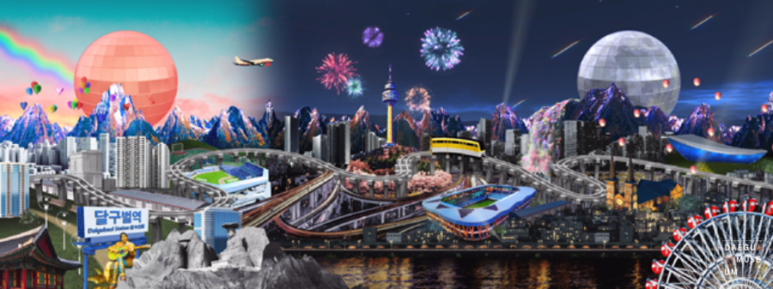

In [11]:
image

In [12]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

headers = {'Ocp-Apim-Subscription-Key': subscription_key }
입력단축키<p>
    sub + tab= subscription_key

params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [13]:
response = requests.post(analyze_url, headers=headers, params=params,
                        json=data)

get방식이 아니라 post방식으로 데이터부르려면 위와같이 입력  헤더스,파람스,(헤더,파라정보)=14의 내용으로 지정

In [14]:
analysis = response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [15]:
analysis

{'categories': [{'name': 'outdoor_',
   'score': 0.01171875,
   'detail': {'landmarks': []}},
  {'name': 'people_show', 'score': 0.796875}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey'],
  'accentColor': '2773A4',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['boat',
   'water',
   'small',
   'table',
   'building',
   'large',
   'filled',
   'sitting',
   'man',
   'decorated',
   'group',
   'standing',
   'docked',
   'many',
   'river',
   'row',
   'colorful',
   'city',
   'people',
   'umbrella',
   'dock',
   'parked',
   'display',
   'riding',
   'room'],
  'captions': [{'text': 'a group of people on a boat',
    'confidence': 0.4359800551466736}]},
 'requestId': 'a333a5d7-4ca7-466b-8730-78dfa8bca266',
 'metadata': {'height': 289, 'width': 773, 'format': 'Png'}}

와... 오늘도 드라마틱하게 만난 해결책. 이미지 주소를 다른걸 가져왔다. 
하....<p>
    오류나던 주소=https://mam.daegu.go.kr/DATA/collections/202101080559169996.jpg
<p>   수정한 주소=https://postfiles.pstatic.net/MjAyMjAzMTBfMzEg/MDAxNjQ2ODkzNjI1Mjcy.mzV1DbaVQvLOZ9qCCrDgM4mBt2vhi1G21cyTCjAZqoYg.JjXb8xXrRc3xf6NQE0sbNFMtZcs6iNW-UDFyRDWXz_0g.PNG.damuseum/SE-4bd4642a-910c-4b32-80c3-c1ea82971084.png?type=w773<p>

제이슨파일이 불러온 결과 해석
    
{'categories': [{'name': 'outdoor_',   'score': 0.01171875,
{'구별': [{'판별결과명': '야외_',   'score': 0.01171875,<- 도출한 결과명에 대한 정확도 =다시말해 이 이미지데이터의 판별정확도는 2% 미만. 이유: 가상이미지이기 때문

   'detail': {'landmarks': []}},
     'detail': {'유명건물': [없음]}}, 
   
  {'name': 'people_show', 'score': 0.796875}],
 'color': {'dominantColorForeground': 'Grey',
 'color': {'전반적 색상': 'Grey',
  'dominantColorBackground': 'Grey',
    'dominantColor배경색': 'Grey',
  'dominantColors': ['Grey'],
    '이미지데이터에서ㅏ 지배적인 색상': ['Grey'],
    
    'description': {'tags': ['boat', 'water',
   'small',
   'table',
   'building',
   'large',
   'filled',
        '설명': {'tags': [보이는 요소들을 하나씩 나열
        
        
        'captions': [{'text': 'a group of people on a boat',
                '컴퓨터가 한줄요약': [{'text': 'a group of people on a boat',
    'confidence': 0.4359800551466736}]},
 'requestId': '3f084767-0c05-44a5-8190-b08fca39bd80',
 'metadata': {'height': 289, 'width': 773, 'format': 'Png'}}

In [16]:
analysis['description']['captions'][0]['text']

'a group of people on a boat'